In [ ]:
import pandas as pd
from google.colab import files
# Create the DataFrame
poke_data = pd.read_csv('pokemon.csv')

# Use the shape function to print out the number of rows and columns
rows, columns = poke_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

TypeError: 'NoneType' object is not subscriptable

Observations: there are far more rows then colums, meaning much more identification metrics

In [ ]:
# Rearranging the DataFrame
name_column = poke_data.pop('name')

In [ ]:
# Rearranging the DataFrame
poke_data.insert(0, 'name', name_column)

In [ ]:
# Verifying the Change
poke_data.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
# Subsetting the DataFrame
poke_base_stat = poke_data[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

In [ ]:
# Generating Summary Statistics
summary_stats = poke_base_stat.describe()
print(summary_stats)

               hp      attack     defense   sp_attack  sp_defense       speed
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000
mean    68.958801   77.857678   73.008739   71.305868   70.911361   66.334582
std     26.576015   32.158820   30.769159   32.353826   27.942501   28.907662
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000
25%     50.000000   55.000000   50.000000   45.000000   50.000000   45.000000
50%     65.000000   75.000000   70.000000   65.000000   66.000000   65.000000
75%     80.000000  100.000000   90.000000   91.000000   90.000000   85.000000
max    255.000000  185.000000  230.000000  194.000000  230.000000  180.000000


In [ ]:
poke_other_stats = poke_data[['height_m', 'weight_kg', 'capture_rate', 'base_egg_steps', 'experience_growth', 'base_happiness']]

In [ ]:
summary_stats = poke_other_stats.describe()
print(summary_stats)

         height_m   weight_kg  base_egg_steps  experience_growth  \
count  781.000000  781.000000      801.000000       8.010000e+02   
mean     1.163892   61.378105     7191.011236       1.054996e+06   
std      1.080326  109.354766     6558.220422       1.602558e+05   
min      0.100000    0.100000     1280.000000       6.000000e+05   
25%      0.600000    9.000000     5120.000000       1.000000e+06   
50%      1.000000   27.300000     5120.000000       1.000000e+06   
75%      1.500000   64.800000     6400.000000       1.059860e+06   
max     14.500000  999.900000    30720.000000       1.640000e+06   

       base_happiness  
count      801.000000  
mean        65.362047  
std         19.598948  
min          0.000000  
25%         70.000000  
50%         70.000000  
75%         70.000000  
max        140.000000  


The average weight of Pokémon in the dataset is approximately 61.38 kg, indicating a wide range of sizes among different species.
There is significant variation in Pokémon weights, as evidenced by the large standard deviation of 109.35 kg, suggesting the presence of both very light and very heavy Pokémon.
The lightest Pokémon in the dataset weighs just 0.1 kg, while the heaviest reaches an impressive 999.9 kg, demonstrating the extreme diversity in Pokémon sizes.
Half of all Pokémon weigh 27.3 kg or less (the median), indicating that the weight distribution is skewed towards lighter Pokémon.
The interquartile range (IQR) of Pokémon weights spans from 9 kg (25th percentile) to 64.8 kg (75th percentile), encompassing a wide range of moderately sized Pokémon.

In [ ]:
# Count Pokémon by Generation
generation_counts = poke_data['generation'].value_counts().sort_index()

In [ ]:
#Extract Index and Values
generations = generation_counts.index
pokemon_counts = generation_counts.values

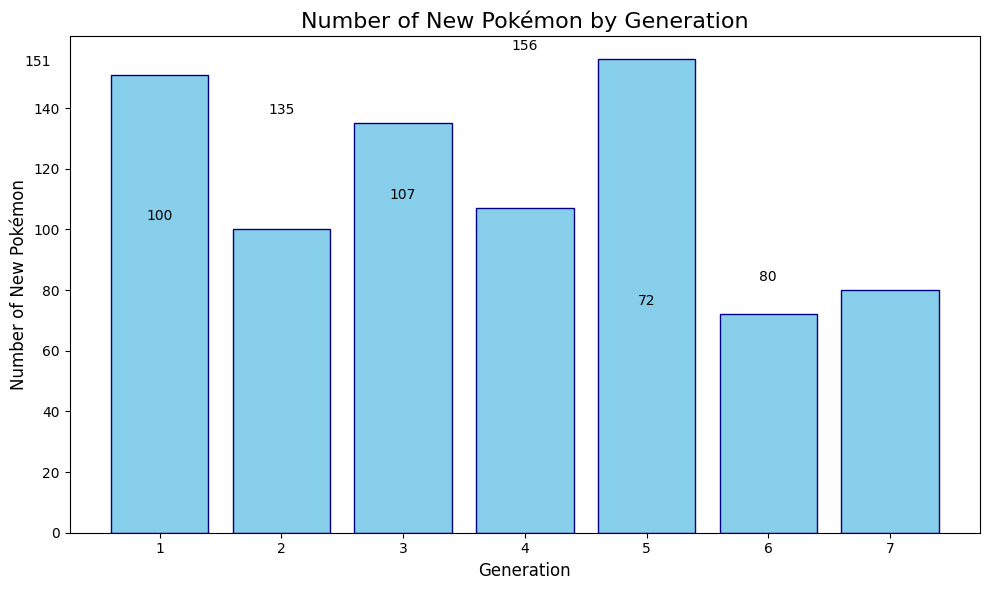

In [ ]:
#Create the Bar Chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(generations, pokemon_counts, color='skyblue', edgecolor='navy')

plt.title('Number of New Pokémon by Generation', fontsize=16)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Number of New Pokémon', fontsize=12)

plt.xticks(generations)
plt.yticks(range(0, max(pokemon_counts)+1, 20))

for i, v in enumerate(pokemon_counts):
    plt.text(i, v + 3, str(v), ha='center')

plt.tight_layout()
plt.show()

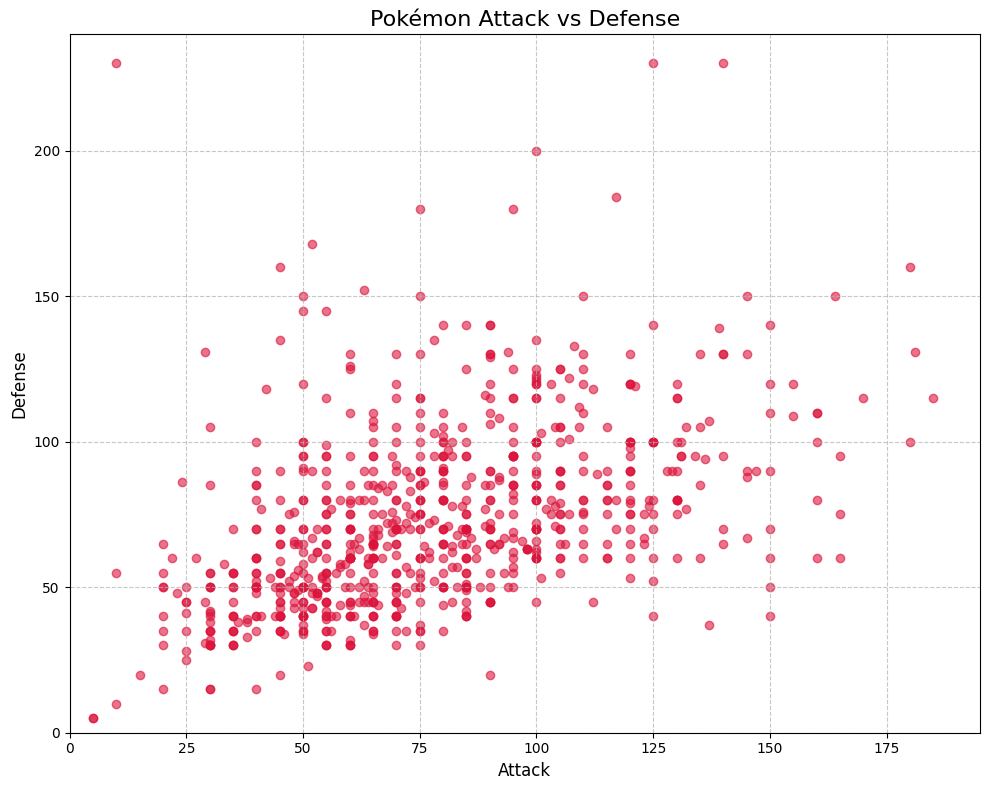

In [ ]:
# Create a scatterplot ro see how ‘attack’ pokemons fare against ’defense’
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(poke_data['attack'], poke_data['defense'], alpha=0.6, color='crimson')

plt.title('Pokémon Attack vs Defense', fontsize=16)
plt.xlabel('Attack', fontsize=12)
plt.ylabel('Defense', fontsize=12)

plt.xlim(0, max(poke_data['attack']) + 10)
plt.ylim(0, max(poke_data['defense']) + 10)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Filter ilter those Pokemons with an attack score of greater than or equal to 140 and a defensescore of greater than or equal to 130
high_attack_defense = poke_data[(poke_data['attack'] >= 140) & (poke_data['defense'] >= 130)]

In [ ]:
# Define Legendary Check
def legendary_check(x):
    return x == 1

In [ ]:
#Create a new column in the ‘poke date’ (call it any name) by applying the ‘legendary check’ function on the ‘is legendary’

poke_data['is_legendary_bool'] = poke_data['is_legendary'].apply(legendary_check)

# Verify the new column
print(poke_data[['name', 'is_legendary', 'is_legendary_bool']].head(10))

         name  is_legendary  is_legendary_bool
0   Bulbasaur             0              False
1     Ivysaur             0              False
2    Venusaur             0              False
3  Charmander             0              False
4  Charmeleon             0              False
5   Charizard             0              False
6    Squirtle             0              False
7   Wartortle             0              False
8   Blastoise             0              False
9    Caterpie             0              False


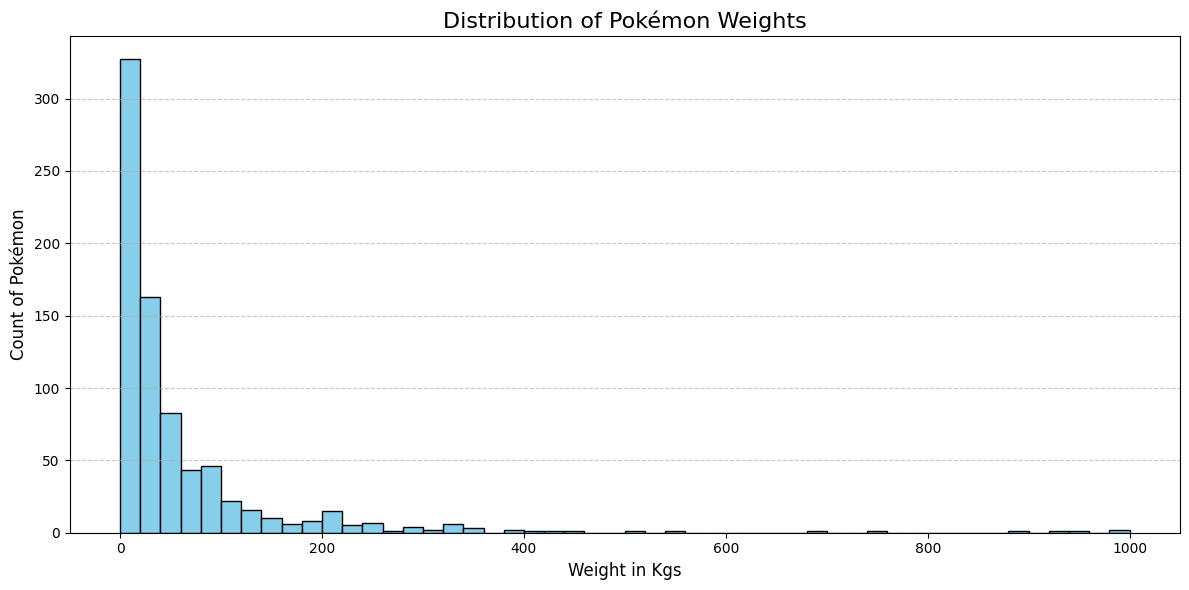

In [ ]:
# Create a histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.hist(poke_data['weight_kg'], bins=50, edgecolor='black', color='skyblue')

plt.title('Distribution of Pokémon Weights', fontsize=16)
plt.xlabel('Weight in Kgs', fontsize=12)
plt.ylabel('Count of Pokémon', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
#Create a multiple-line graph that shows the mean values of ‘hp’, ‘attack’, ‘defense’,‘speed’ across different generation
# Group the data by generation and calculate mean stats
poke_stats_by_generation = poke_data.groupby('generation')[['hp', 'attack', 'defense', 'speed']].mean()

# Reset the index to make 'generation' a column
poke_stats_by_generation = poke_stats_by_generation.reset_index()

print(poke_stats_by_generation)

   generation         hp     attack    defense      speed
0           1  64.344371  74.529801  70.079470  70.152318
1           2  70.980000  69.960000  71.790000  61.610000
2           3  65.666667  77.185185  72.637037  63.577778
3           4  73.102804  82.672897  76.168224  70.074766
4           5  70.314103  80.557692  71.961538  66.519231
5           6  71.111111  76.527778  73.555556  66.652778
6           7  70.575000  84.637500  78.012500  64.037500


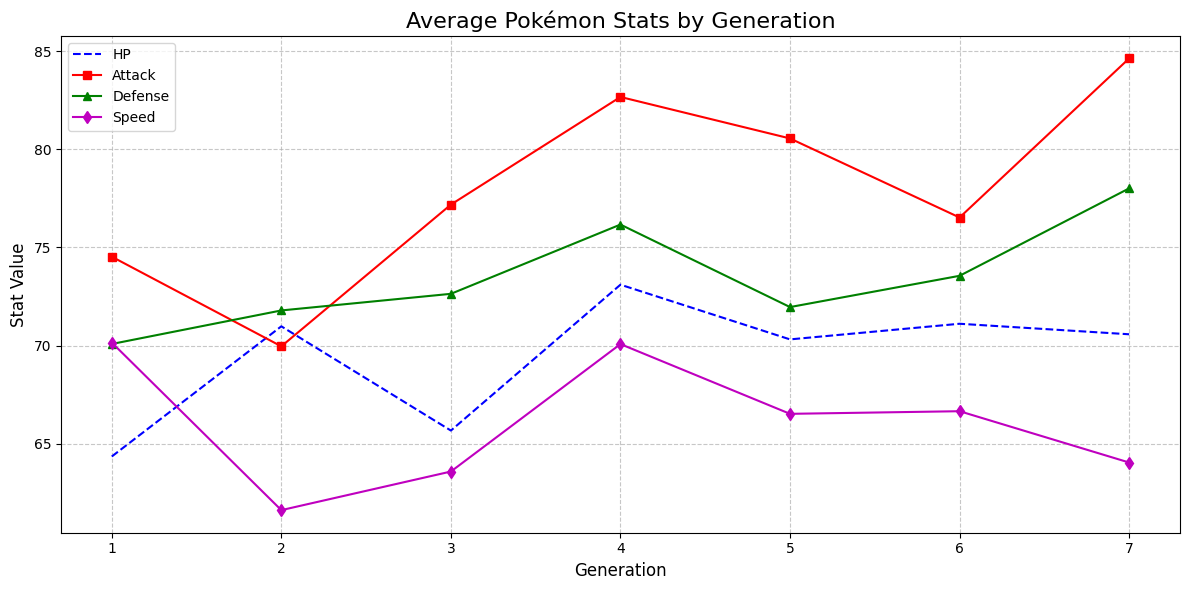

In [ ]:
# Create the multi line graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot each stat line
plt.plot(poke_stats_by_generation['generation'], poke_stats_by_generation['hp'], 'b--', label='HP')
plt.plot(poke_stats_by_generation['generation'], poke_stats_by_generation['attack'], 'rs-', label='Attack')
plt.plot(poke_stats_by_generation['generation'], poke_stats_by_generation['defense'], 'g^-', label='Defense')
plt.plot(poke_stats_by_generation['generation'], poke_stats_by_generation['speed'], 'md-', label='Speed')

plt.title('Average Pokémon Stats by Generation', fontsize=16)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Stat Value', fontsize=12)

plt.xticks(poke_stats_by_generation['generation'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()